In [1]:
import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:

# Cargar los datos desde la pagina sin necesidad de adjuntar la base de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Separar características y etiquetas
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# Normalización de los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

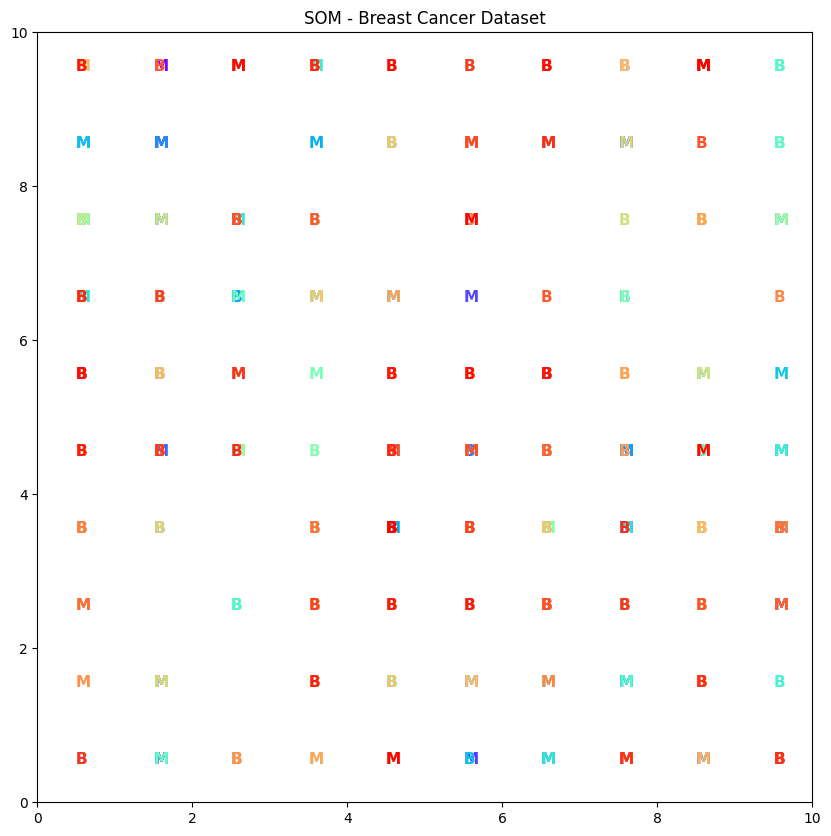

In [3]:
# Inicialización del SOM
som = MiniSom(x=10, y=10, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_normalized)

# Entrenamiento del SOM
som.train_random(X_normalized, num_iteration=100)

# Visualización del SOM
plt.figure(figsize=(10, 10))
for i, x in enumerate(X_normalized):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, y.iloc[i], color=plt.cm.rainbow(i / len(X_normalized)), fontdict={'weight': 'bold', 'size': 11})
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.title('SOM - Breast Cancer Dataset')
plt.show()
